In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression as lm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as SSE
%matplotlib inline

In [11]:
df = pd.read_csv('Assignment2.data', sep = '\t')
y_spring = df['SpringPos'].to_numpy()
y_stock = df['StockPrice'].to_numpy()
x = np.arange(1, len(y_spring)+1)

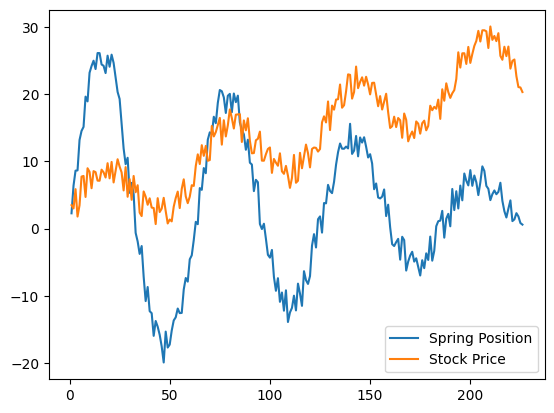

In [12]:
plt.plot(x, y_spring, label = 'Spring Position')
plt.plot(x, y_stock, label = 'Stock Price')
plt.legend()
plt.show()

## Helper functions

In [13]:
def plotter(x, y, w, ylabel, title, xlabel):
    y_pred = w*x
    plt.plot(x, y, 'o')
    plt.plot(x, y_pred)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.legend(['Actual', 'Predicted'])
    plt.show()

def plotter_2(X, y, W, ylabel, title, xlabel):
    y_pred = X@W[: -1] + W[-1]
    x = np.arange(1, len(y)+1)
    plt.plot(x, y, 'o')
    plt.plot(x, y_pred)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.legend(['Actual', 'Predicted'])
    plt.show()


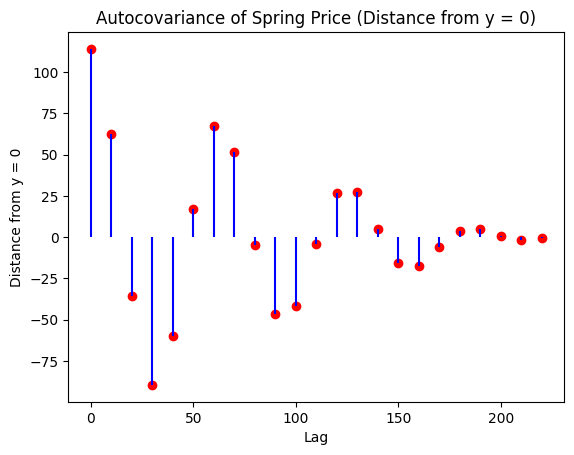

In [25]:
def autocovariance(y, lag=1):
    """
    Calculate the autocovariance of a time series.
    
    Parameters:
    y (array-like): Time series data.
    lag (int): The lag at which to calculate the autocovariance.
    
    Returns:
    float: The autocovariance at the specified lag.
    """
    n = len(y)
    y_mean = np.mean(y)
    cov = 0.0
    
    for i in range(n - lag):
        cov += (y[i] - y_mean) * (y[i + lag] - y_mean)
    
    return cov / n

# Example usage
lag = np.arange(0, len(y_spring), 10)
autocov = [autocovariance(y_spring, l) for l in lag]


# Plot the scatter plot
plt.scatter(lag, autocov, color='red')

# Add vertical lines
plt.vlines(lag, 0, autocov, colors='blue')

# Label the axes and set the title
plt.xlabel('Lag')
plt.ylabel('Distance from y = 0')
plt.title('Autocovariance of Spring (Distance from y = 0)')

# Show the plot
plt.show()

In [27]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Example y_stock data (replace with your actual y_stock data)
y_stock = np.random.rand(100)  # Replace with your actual y_stock data

# Perform the Dickey-Fuller test
result = adfuller(y_stock)

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -4.472561573181246
p-value: 0.00022034936190409098
Critical Values:
   1%: -3.4996365338407074
   5%: -2.8918307730370025
   10%: -2.5829283377617176
